# Importing library

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DATA preprocessing

In [55]:
data = pd.read_csv('data/USA_Housing.csv')

In [56]:
data.head(1)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."


In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1034 to 3772
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 273.4 KB


In [57]:
data.dropna(inplace=True) #replace missing value


In [58]:
data = data.drop(['Address'], axis=1)

In [112]:
data = data.sample(n=len(data), random_state=1)
data.head(1)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
1034,74740.732876,5.625513,5.787261,4.36,29954.617619,1.168355e+06


# Splitting the Dataset

In [113]:
from sklearn.model_selection import train_test_split

X = data.drop(['Price'], axis=1) #droped column Price
y = data['Price'] #take column Price



In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_features = ['Area Income','Area Income','Area Number of Rooms','Area Number of Bedroom', 'Area Population']

In [115]:
train_data = X_train.join(y_train)
test_data = X_test.join(y_test)

print(len(train_data))
print(len(test_data))

4000
1000


In [116]:
# train_data.hist(figsize=(8, 8))

In [117]:
# train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
# train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
# train_data['population'] = np.log(train_data['population'] + 1)
# train_data['households'] = np.log(train_data['households'] + 1)

# train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
# train_data['households_rooms'] = train_data['total_rooms'] / train_data['households']

In [118]:
# test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
# test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
# test_data['population'] = np.log(test_data['population'] + 1)
# test_data['households'] = np.log(test_data['households'] + 1)


# test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
# test_data['households_rooms'] = test_data['total_rooms'] / test_data['households']

In [119]:
# train_data.Address.value_counts()

In [120]:
# train_data = train_data.join(pd.get_dummies(train_data.Address)).drop(['Address'], axis = 1)

In [121]:
# test_data = test_data.join(pd.get_dummies(test_data.Address)).drop(['Address'], axis = 1)
# test_data.head()

<Axes: >

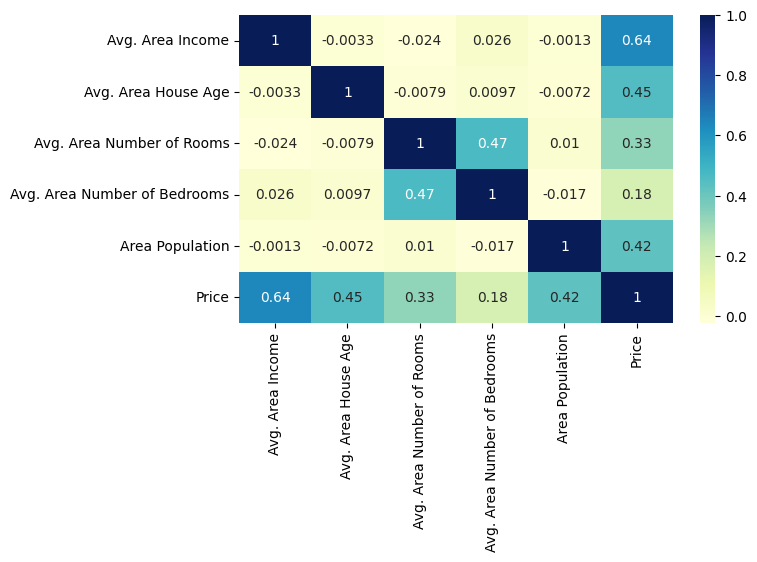

In [122]:
plt.figure(figsize=(7,4))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [123]:
X_train, y_train = train_data.drop(['Price'], axis=1), train_data['Price']
X_test, y_test = test_data.drop(['Price'], axis=1), test_data['Price']

<Axes: xlabel='Avg. Area Income', ylabel='Area Population'>

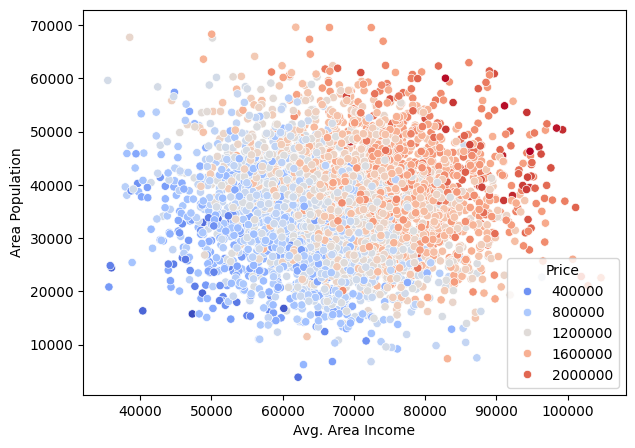

In [124]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Avg. Area Income', y='Area Population', data = train_data, hue= "Price", palette='coolwarm')

# Model LinearRegression

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [74]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as mse
knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)
mse(knn.predict(X_train), y_train, squared=False)

158830.27550814635

In [75]:
X_test_s = scaler.transform(X_test)

In [76]:
reg.score(X_test_s, y_test)

C:\Users\lol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-113.27520017334251

In [77]:
reg.score(X_test, y_test)

0.9194435576294382

# Linear regression model

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [137]:
# loading the linear regression model
lin_reg_model = LinearRegression()
# Now we can fit the model to our dataset

lin_reg_model.fit(X_train_s,y_train)

LinearRegression()

# Prediction on Training data

In [138]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train_s)

In [139]:
# R squared Error
train_error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error - Training : ", train_error_score)

R squared Error - Training :  0.0008022539425746045


In [140]:
Y_pred = lin_reg_model.predict(X_test_s)

# Evaluation

In [141]:
from sklearn.preprocessing import StandardScaler

In [142]:
test_error_score = metrics.r2_score(y_test, Y_pred)
print("R squared Error - Test: ", test_error_score)

R squared Error - Test:  -0.0017051898452604686


In [143]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [144]:
X_train_scaled

array([[-0.96271201,  1.14130748, -0.27742567, -0.56079193,  0.18354431],
       [-1.53770458,  0.47677388, -0.65609742, -1.56348711,  0.316492  ],
       [-1.28102785, -1.17586096, -0.84304471, -0.72383179,  1.35584546],
       ...,
       [-0.66342929,  0.23118782, -0.68178671, -0.79719973,  0.15750657],
       [ 0.63831443,  0.01170526,  0.30040659,  1.95002202,  0.60498994],
       [ 0.21527485,  2.77449619, -0.66258972, -0.63415987,  0.09682138]])

In [154]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [162]:
reg.score(X_test, y_test)

0.9166268091134999

In [163]:
b_norm = reg.intercept_
w_norm = reg.coef_

y_pred_reg = reg.predict(X_train)
# make a prediction using w,b.
y_pred = np.dot(X_train, w_norm) + b_norm
print(f"prediction using np.dot() and reg.predict match: {(y_pred == y_pred_sgd).all()}")
print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and reg.predict match: True
Prediction on training set:
[1187882.73148465  918197.01000641  843761.00130669  864978.80772682]
Target values 
[1364832.00341912  942397.06647622 1017775.5118271   866142.18393487]


In [159]:
y_pred_sgd = reg.predict(X_train)

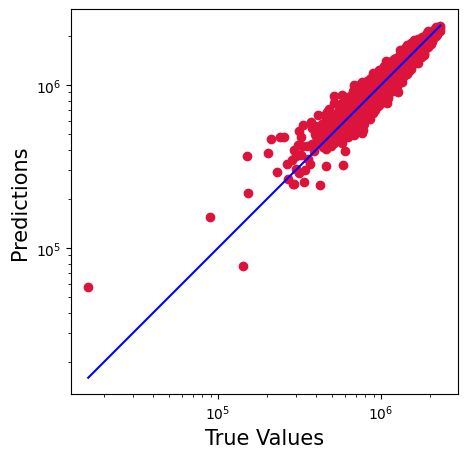

In [157]:
plt.figure(figsize=(5,5))
plt.scatter(y_train, y_pred_sgd, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_sgd), max(y_train))
p2 = min(min(y_pred_sgd), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Random Forest

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
regr = RandomForestRegressor(max_depth=15, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, random_state=0)

In [80]:
regr.score(X_test, y_test)

0.888139926218259

# Gradient Descent

In [125]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

Scale/normalize the training data

In [165]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:Avg. Area Income                69248.009598
Avg. Area House Age                 6.874784
Avg. Area Number of Rooms           7.523394
Avg. Area Number of Bedrooms        4.500000
Area Population                 65738.265214
dtype: float64
Peak to Peak range by column in Normalized X:[6.50850626 6.99230463 7.50983974 3.668397   6.67370101]


In [132]:
y_train = y_train.to_numpy()

Create and fit the regression model

In [131]:
sgdr = SGDRegressor(max_iter=100000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(max_iter=100000)
number of iterations completed: 8, number of weight updates: 32001.0


In [166]:
sgdr.score(X_test_scaled, y_test)

0.916664901082543

Make predictions

In [128]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [230232.92673323 163234.56693272 121456.51620339   3353.3320062
 150317.05715651], b:[1230254.06058983]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


In [134]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b.
y_pred = np.dot(X_train, w_norm) + b_norm
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")
print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: False
Prediction on training set:
[1186921.05302812  916693.76209383  842364.29310546  864352.63518338]
Target values 
[1364832.00341912  942397.06647622 1017775.5118271   866142.18393487]


Plot Results

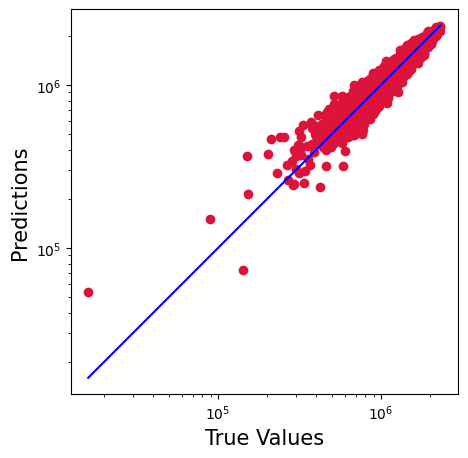

In [147]:
plt.figure(figsize=(5,5))
plt.scatter(y_train, y_pred_sgd, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_sgd), max(y_train))
p2 = min(min(y_pred_sgd), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()